In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
import load_data

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Loading BokehJS ...

In [2]:
df = load_data.load_county_level()
df = df.sort_values(load_data.outcome_deaths, ascending=False)
outcome_cases = load_data.outcome_cases # most recent day
outcome_deaths = load_data.outcome_deaths
deaths_keys = [k for k in df.keys() if '#Deaths' in k]
cases_keys = [k for k in df.keys() if '#Cases' in k]
deaths = df[deaths_keys].values
cases = df[cases_keys].values
df['deaths'] = [deaths[i] for i in range(deaths.shape[0])]
df['cases'] = [cases[i] for i in range(cases.shape[0])]

# potentially useful info

In [10]:
important_vars = load_data.important_keys()

# look at one county

In [3]:
row = df.iloc[0]

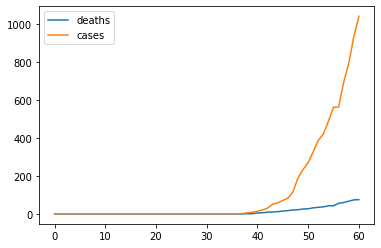

In [4]:
plt.plot(row['deaths'], label='deaths')
plt.plot(row['cases'], label='cases')
plt.legend()
plt.show()

# visualize counties with most deaths

In [ ]:
df_tab = df[[outcome_deaths, outcome_cases, 'CountyName', 'StateName', 
             'PopulationDensityperSqMile2010',
             'deaths', 'cases']].head(12)        
# df_tab = df_tab.rename(columns={'PopulationEstimate2018': 'Population\n(thousands})'})
df_tab = df_tab.rename(columns={'PopulationDensityperSqMile2010': 'PopDensity'})
df_tab = df_tab.rename(columns={outcome_deaths: '#Deaths', outcome_cases: '#Cases'})
df_tab = df_tab.rename(columns={'CountyName': 'County', 'StateName': 'State'})
print(df_tab.keys())
# df_tab['Population']
keys_table = [k for k in df_tab.keys() if not k in ['deaths', 'cases']]
viz.viz_curves(df_tab, 
               key_toggle='County',
               keys_table=keys_table,
               filename='results/county_curves.html')
print('done!')